# Calculating Lyapunov Exponent for Double Pendulum System

Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Defining global constants

In [2]:
m1 = 1   #mass of the 1st bob 
m2 = 1    #mass of the 2nd bob  
g = 10 #gravity
r1 = 1  #length of string from pivot to first bob   
r2 = 1   #length of string from 1st bob to 2nd bob

Defining Functions

Angular Acceleration functions. These functions take the angles and angular velocity of both the bobs as input and return their respective angular accelerations. The corresponding relations for angular acceleration are obtained from the equations of motion.

In [3]:
def angular_acc1( bob1_arr, bob2_arr):
    num = (-g *(2*m1+m2)*np.sin( bob1_arr[0]) - m2*g*np.sin( bob1_arr[0]-2* bob2_arr[0])
    -2* m2*np.sin(bob1_arr[0]- bob2_arr[0]) * (r2*pow( bob2_arr[1],2)+r1*pow( bob1_arr[1],2)*np.cos( bob1_arr[0]- bob2_arr[0])))
    den = r1*(2*m1+m2-m2 * np.cos(2* bob1_arr[0]-2* bob2_arr[0]))
    return num/den

def angular_acc2( bob1_arr, bob2_arr):
    num = ((2*np.sin( bob1_arr[0]- bob2_arr[0])) * 
    (r1*pow( bob1_arr[1],2)*(m1+m2)+g*(m1+m2)*np.cos( bob1_arr[0])+r2*pow( bob2_arr[1],2)*m2*np.cos( bob1_arr[0]- bob2_arr[0])))
    den = r2*(2*m1+m2-m2 * np.cos(2* bob1_arr[0]-2* bob2_arr[0]))
    return num/den

The following functions calculate the derivatives of angle and angular velocity for both the bobs of the double pendulum for any given state of the system

In [4]:
def derivative_bob1( bob1_arr, bob2_arr,t):
    return np.array([ bob1_arr[1],angular_acc1( bob1_arr, bob2_arr)])

def derivative_bob2( bob2_arr, bob1_arr,t):
    return np.array([ bob2_arr[1],angular_acc2( bob1_arr, bob2_arr)])

This is where the magic happens. This function performs one iteration of the Runge-Kutta method upto fourth order to find out the state of the system after every step

In [5]:
def rk4(derivative,func_i,func_i2, x_i,h):
    # h = step size
    k1 = derivative(func_i,func_i2,x_i)
    k2 = derivative(func_i+(h*k1/2),func_i2,h*k1/2)
    k3 = derivative(func_i+(h*k2/2),func_i2,h*k2/2)
    k4 = derivative(func_i+h*k3,func_i2,h*k3)
    func = func_i + (1/6) * h * (k1 +2*k2+2*k3+k4)
    x = x_i + h
    return (x,func)

The following function returns the evolution of a double pendulum system given the initial conditions and step size and number of steps for RK4 method

In [6]:
def solve_system(bob1_arr, bob2_arr,h,steps_no):
    t = 0 # starting time
    time_arr = np.array([t])
    func_array1 = np.array([bob1_arr])
    func_array2 = np.array([bob2_arr])

    for i in range(steps_no):
        temp =bob1_arr
        (t,bob1_arr) = rk4(derivative_bob1, bob1_arr, bob2_arr, t, h)
        t -=h 
        (t,bob2_arr) = rk4(derivative_bob2, bob2_arr, temp, t, h)
        time_arr2 = np.append(time_arr, t)
        func_array1 = np.vstack((func_array1,np.array([bob1_arr])))
        func_array2 = np.vstack((func_array2,np.array([bob2_arr])))
    
    [theta1, omega1] = func_array1.transpose()
    [theta2, omega2] = func_array2.transpose()
    return(theta1,omega1,theta2,omega2)

Solving for a double pendulum with the initial conditions: theta1 = theta2 = pi/2, omega1 = 0 and omega2 = 1

In [7]:
bob1_arr = np.array([np.pi/2,0])
bob2_arr = np.array([np.pi/2,1])
h = 0.01 # step size for the RK4 method
steps_no = 100000 # number of steps of the RK4 method
(s1_theta1,s1_omega1,s1_theta2,s1_omega2) = solve_system(bob1_arr, bob2_arr,h,steps_no)

In [8]:
t = np.linspace(0,1000,num = steps_no)

Solving for the second system with slightly different initial conditions

In [9]:
bob1_arr = np.array([np.pi/2,0])
bob2_arr = np.array([np.pi/2.01,1]) #theta2 = 89.55 degrees
h = 0.01 # step size for the RK4 method
steps_no = 100000 # number of steps of the RK4 method
(s2_theta1,s2_omega1,s2_theta2,s2_omega2) = solve_system(bob1_arr, bob2_arr,h,steps_no)

In [10]:
d1 = (s1_theta1 - s2_theta1)[0:steps_no]
d2 = (s1_theta2 - s2_theta2)[0:steps_no]
d3 = (s1_omega1 - s2_omega1)[0:steps_no]
d4 = (s1_omega2 - s2_omega2)[0:steps_no]

In [11]:
d = pow(d1,2)+pow(d2,2)+pow(d3,2)+pow(d4,2)
d_abs = abs(d1)+abs(d2)+abs(d3)+abs(d4)

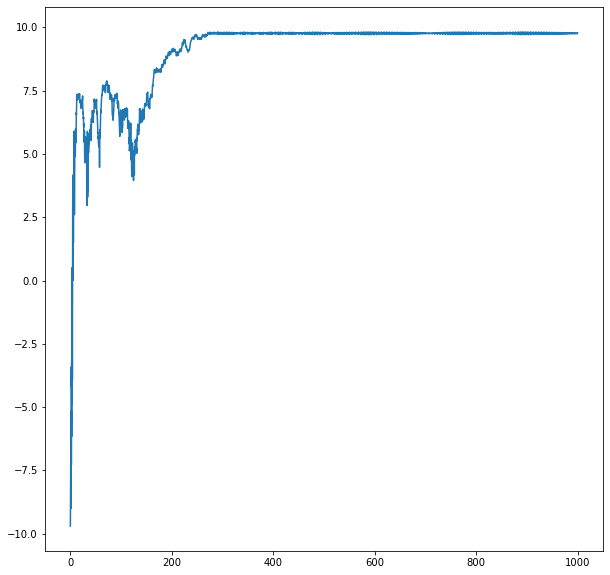

In [12]:
plt.figure(figsize=(10,10))
plt.plot(t,np.log(d))

In [13]:
np.log(d)[steps_no-10]

9.779414389645408

Text(0, 0.5, 'lambda (1/s)')

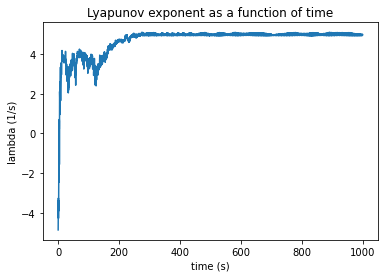

In [51]:
plt.plot(t,np.log(d_abs))
plt.title('Lyapunov exponent as a function of time')
plt.xlabel('time (s)')
plt.ylabel('lambda (1/s)')

In [49]:
np.log(d_abs)[steps_no-1]

4.971901051976271

Text(0, 0.5, 'theta1')

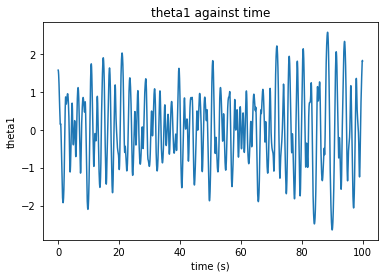

In [24]:
plt.plot(t[0:10000],s1_theta1[0:10000])
plt.title("theta1 against time")
plt.xlabel("time (s)")
plt.ylabel("theta1")

Text(0, 0.5, 'theta2')

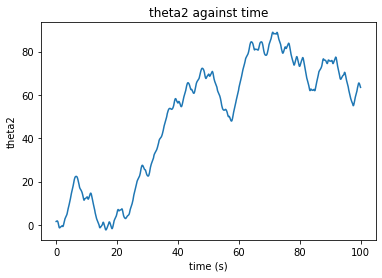

In [25]:
plt.plot(t[0:10000],s1_theta2[0:10000])
plt.title("theta2 against time")
plt.xlabel("time (s)")
plt.ylabel("theta2")

Text(0, 0.5, 'omega1')

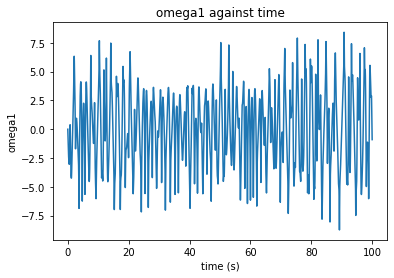

In [26]:
plt.plot(t[0:10000],s1_omega1[0:10000])
plt.title("omega1 against time")
plt.xlabel("time (s)")
plt.ylabel("omega1")

Text(0, 0.5, 'omega1')

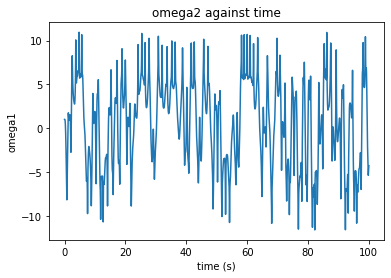

In [27]:
plt.plot(t[0:10000],s1_omega2[0:10000])
plt.title("omega2 against time")
plt.xlabel("time (s)")
plt.ylabel("omega1")

Text(0, 0.5, 'theta2')

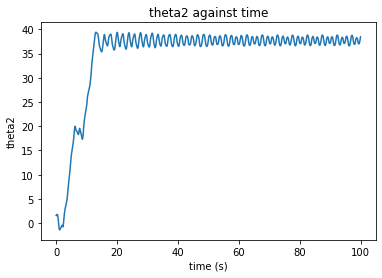

In [28]:
plt.plot(t[0:10000],s2_theta2[0:10000])
plt.title("theta2 against time")
plt.xlabel("time (s)")
plt.ylabel("theta2")

In [35]:
d = (pow(d,0.5))

Text(0, 0.5, 'Difference')

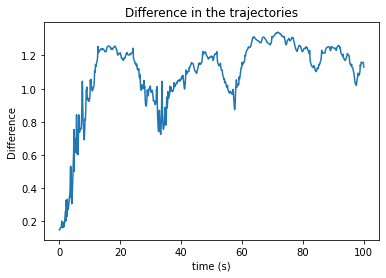

In [47]:
plt.plot(t[0:10000],d[0:10000])
plt.title("Difference in the trajectories")
plt.xlabel("time (s)")
plt.ylabel("Difference")

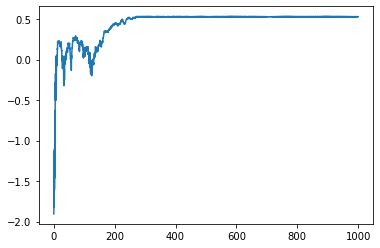

In [44]:
plt.plot(t,np.log(d))

In [45]:
np.log(d)

array([-1.90607773, -1.90606511, -1.90602467, ...,  0.5298646 ,
        0.52991822,  0.52996644])